# pip

In [ ]:
!pip install Faker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 7.1 MB/s 


# Analise exploratória 


In [ ]:
import numpy as np 
import pandas as pd 
import spacy 
from sklearn import preprocessing  
import re
import nltk
from nltk.corpus import stopwords 
from faker import Faker
import string
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.datasets import make_classification

In [ ]:
data = pd.read_csv('UpdatedResumeDataSet.csv')
data.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [ ]:
data.groupby(['Category']).size()

Category
Advocate                     20
Arts                         36
Automation Testing           26
Blockchain                   40
Business Analyst             28
Civil Engineer               24
Data Science                 40
Database                     33
DevOps Engineer              55
DotNet Developer             28
ETL Developer                40
Electrical Engineering       30
HR                           44
Hadoop                       42
Health and fitness           30
Java Developer               84
Mechanical Engineer          40
Network Security Engineer    25
Operations Manager           40
PMO                          30
Python Developer             48
SAP Developer                24
Sales                        40
Testing                      70
Web Designing                45
dtype: int64

In [ ]:
len(data)

962

# Tratamento dos dados

Limpar stop words

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 

def remove_mystopwords(sentence):
    tokens = sentence.split(" ")
    word_tokens = word_tokenize(sentence)
    tokens_filtered = [w for w in word_tokens if not w.lower() in stop_words and not w.isdigit()] 
    return (" ").join(tokens_filtered)

def etl(sentence):
  sentence = sentence.lower()
  sentence = re.sub('[^0-9a-z]+', ' ', sentence)
  sentence = remove_mystopwords(sentence)
  return sentence

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data["Resume_clean"] = data["Resume"].apply(etl)

In [ ]:
data.head()

,Category,Resume,Resume_clean,textToVec,categorical_label,names
0,Data Science,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas num...,"[0.23912355, 0.024014262, 0.19490698, -0.14557...",6,Joseph Harvey
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education details may may b e uit rgpv data sc...,"[0.48902506, 0.07057942, 0.066882715, -0.24402...",6,Eric Clark
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",areas interest deep learning control system de...,"[0.55039436, 0.09611249, 0.059416205, -0.24771...",6,Harry Hernandez
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills r python sap hana tableau sap hana sql ...,"[0.2846841, -0.0037783415, 0.14132875, -0.2154...",6,Lee Black
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education details mca ymcaust faridabad haryan...,"[0.73838824, 0.122646645, -0.06683265, -0.2824...",6,Sheryl Brown


De texto para vetor

In [ ]:
nlp = spacy.load("en_core_web_sm")

def textToVec(sentence):
  model= nlp(sentence)
  return model.vector

In [ ]:
data["textToVec"] = data["Resume_clean"].apply(textToVec)
data["textToVec"] = data["Resume"].apply(textToVec)

In [ ]:
data.head()

,Category,Resume,Resume_clean,textToVec
0,Data Science,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas num...,"[0.23912355, 0.024014262, 0.19490698, -0.14557..."
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education details may may b e uit rgpv data sc...,"[0.48902506, 0.07057942, 0.066882715, -0.24402..."
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",areas interest deep learning control system de...,"[0.55039436, 0.09611249, 0.059416205, -0.24771..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills r python sap hana tableau sap hana sql ...,"[0.2846841, -0.0037783415, 0.14132875, -0.2154..."
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education details mca ymcaust faridabad haryan...,"[0.73838824, 0.122646645, -0.06683265, -0.2824..."


In [ ]:
le = preprocessing.LabelEncoder()
le.fit(data.Category)
data['categorical_label'] = le.transform(data.Category)
data

,Category,Resume,Resume_clean,textToVec,categorical_label
0,Data Science,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas num...,"[0.23912355, 0.024014262, 0.19490698, -0.14557...",6
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education details may may b e uit rgpv data sc...,"[0.48902506, 0.07057942, 0.066882715, -0.24402...",6
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",areas interest deep learning control system de...,"[0.55039436, 0.09611249, 0.059416205, -0.24771...",6
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills r python sap hana tableau sap hana sql ...,"[0.2846841, -0.0037783415, 0.14132875, -0.2154...",6
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education details mca ymcaust faridabad haryan...,"[0.73838824, 0.122646645, -0.06683265, -0.2824...",6
...,...,...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,computer skills proficient ms office word basi...,"[0.1975813, -0.094179, 0.28510758, -0.2140149,...",23
958,Testing,â Willingness to accept the challenges. â ...,willingness accept challenges positive thinkin...,"[0.42632607, -0.0768489, 0.13183562, -0.243334...",23
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",personal skills quick learner eagerness learn ...,"[0.4513332, -0.056805685, 0.15219933, -0.29201...",23
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,computer skills software knowledge ms power po...,"[0.55251086, -0.07310319, -0.06944631, -0.3034...",23


In [ ]:
data[['Category', 'categorical_label']].drop_duplicates().sort_values(by='categorical_label')

,Category,categorical_label
84,Advocate,0
104,Arts,1
455,Automation Testing,2
852,Blockchain,3
403,Business Analyst,4
295,Civil Engineer,5
0,Data Science,6
709,Database,7
599,DevOps Engineer,8
824,DotNet Developer,9


# Nomes

In [ ]:
names = []
fake = Faker()
for _ in range(962):
  names.append(fake.name())

In [ ]:
df = pd.DataFrame(names)

In [ ]:
df['names'] = names

In [ ]:
extracted_col = df["names"]

In [ ]:
data = data.join(extracted_col)

In [ ]:
data

,Category,Resume,Resume_clean,textToVec,categorical_label,names
0,Data Science,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas num...,"[0.23912355, 0.024014262, 0.19490698, -0.14557...",6,Joseph Harvey
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education details may may b e uit rgpv data sc...,"[0.48902506, 0.07057942, 0.066882715, -0.24402...",6,Eric Clark
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",areas interest deep learning control system de...,"[0.55039436, 0.09611249, 0.059416205, -0.24771...",6,Harry Hernandez
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills r python sap hana tableau sap hana sql ...,"[0.2846841, -0.0037783415, 0.14132875, -0.2154...",6,Lee Black
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education details mca ymcaust faridabad haryan...,"[0.73838824, 0.122646645, -0.06683265, -0.2824...",6,Sheryl Brown
...,...,...,...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,computer skills proficient ms office word basi...,"[0.1975813, -0.094179, 0.28510758, -0.2140149,...",23,Jerry English
958,Testing,â Willingness to accept the challenges. â ...,willingness accept challenges positive thinkin...,"[0.42632607, -0.0768489, 0.13183562, -0.243334...",23,Felicia Richards
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",personal skills quick learner eagerness learn ...,"[0.4513332, -0.056805685, 0.15219933, -0.29201...",23,Jeremy Salazar
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,computer skills software knowledge ms power po...,"[0.55251086, -0.07310319, -0.06944631, -0.3034...",23,Jared Keith


In [ ]:
data.to_csv('Data.csv')

# Modelagem: Classificação

In [ ]:
train = data.sample(frac = 0.8, replace=False, random_state = 25)
test = data.drop(train.index)

In [ ]:
X_train = np.array(train['textToVec'].tolist())
y_train = np.array(train['categorical_label'].tolist())

X_test = np.array(test['textToVec'].tolist())
y_test = np.array(test['categorical_label'].tolist())

In [ ]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
clf2 = RandomForestClassifier(n_estimators=500, max_depth=2, random_state=0)

In [ ]:
clf2.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=500, random_state=0)

# Avaliação do modelo 

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7552083333333334

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


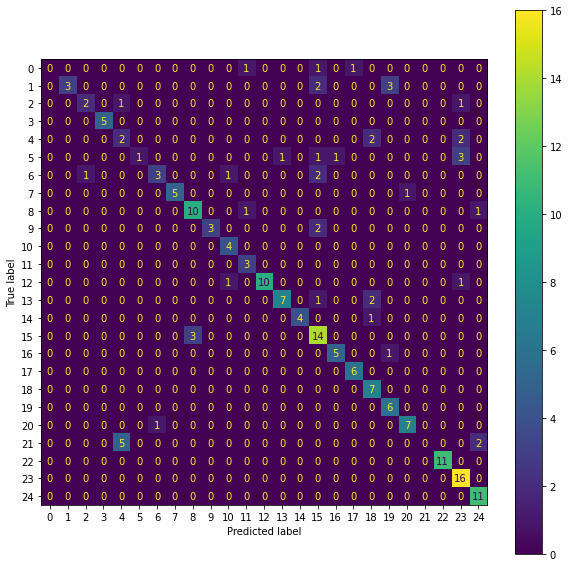

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
f, ax = plt.subplots(1, figsize=(10,10))
plot_confusion_matrix(clf, X_test, y_test,ax=ax)  
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


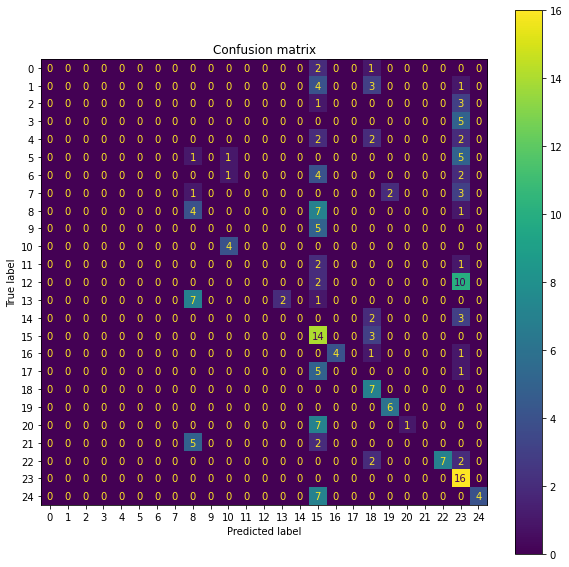

In [ ]:
_ , ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(clf2, X_test, y_test, ax=ax)
plt.title('Confusion matrix')
plt.show()

# Produto Final 

In [ ]:
Curriculo_teste = ("technical expertise cisco asa checkpoint firewall gaia splat palo alto firewalls firewall management tools cisco security management csm checkpoint smart center palo alto panorama f5 load balancer ltm networking hands cisco router cisco switches security management event management rsaenvision ticketing tools bmc remedy service technologies software languages python vb scriptingeducation details january january bachelor engineering information technology mumbai maharashtra mumbai university senior network security analyst senior network security analyst accenture skill details firewalls exprience months cisco exprience months security exprience months firewall exprience months checkpoint exprience monthscompany details company accenture description install configure upgrades troubleshoot cisco asa firewalls x includes single multi context firewalls f5 ltm configuration vip pools ssl offloading certificate renewals code upgrade troubleshoot issues pulse secure juniper management includes creating roles realm polices remote access reverse proxy code upgrade pac file configuration preparing design documents hld lld ip schema configuration network devices per customer requirements data center environment incident management change management problem management itil process key projects worked resiliency project like firewall policy lockdown software code upgrade firewalls load balancers end end co ordination firewall deployment tools cisco security manager x company zensar technologies description install upgrades checkpoint firewalls gaia r75 r77 policy deployment troubleshoot checkpoint firewalls palo alto firewall cisco asa multiple sites belongs us canada emea region configure upgrades troubleshoot cisco routers cisco 29xx 28xx 19xx cisco switches cisco meraki ap meraki cloud f5 ltm configuration troubleshooting operational issues company infosys technologies description responsibilities install configure upgrade troubleshoot checkpoint firewalls cisco routers switches configure monitor troubleshoot issues within organization lan wan customer connectivity networks interface vendors service providers ensuring hardware software problems dealt efficiently effectively minimal downtime company hcl comnet description responsibilities event moitoring administration rsa envision siem proficient researching traffic patterns identify false positives malicious traffic within ids ips scanners qualis firewalls experience writing correlation rules parsers developing uds unsupported device logs analyze large volume security events maintaining high quality analysis change configuration management exposure company wipro technologies description administrator manage troubleshoot multi vendor network infrastructure consisting cisco juniper platforms cisco router cisco stack wise switches 3750e access switch cisco chassis cisco asa firewalls juniper sa ssl vpn provisioning troubleshooting access issues related rsa entrust 2fa user accounts taking network security devices configuration back weekly monthly basis")

In [ ]:
def classificacaoCarreira(curriculo):
  Transformar_vetor = textToVec(curriculo)
  y_pred = clf.predict(Transformar_vetor.reshape(1, -1))
  print(y_pred)
  Transformar_letra = le.inverse_transform(y_pred)
  return Transformar_letra 

In [ ]:
print(classificacaoCarreira(Curriculo_teste))

[2]
['Automation Testing']


In [ ]:
def categoria(categoria, numero=2):
  return data[data['Category']==categoria][['Category', 'names', 'Resume_clean']].iloc[:numero]

In [ ]:
categoria('Health and fitness', 3)

,Category,names,Resume_clean
265,Health and fitness,Katherine Butler,education details january january first year s...
266,Health and fitness,Amy Elliott,education details january nutrition exercise p...
267,Health and fitness,Matthew Gomez,personal skills good verbal written communicat...


# API

In [ ]:
resultado = categoria('Automation Testing', 4)
resultado.to_json(orient="split")

'{"columns":["Category","names","Resume_clean"],"index":[455,456,457,458],"data":[["Automation Testing","Suzanne Murray","excellent grasping power learning new concepts technology highly motivated team player strong work ethics committed hard work ability work co ordinate team effectively enthusiastic self starter team player quick independent learner education details january bachelor technology information technology branch bput university january diploma engineering brahmapur orissa u c p engineering school software testing automation engineer software testing automation engineer tech mahindra skill details company details company tech mahindra description india duration oct till date project description bt group plc trading bt formerly british telecom british multinational telecommunications holding company head offices london united kingdom worked air logistics program banner british telecom project handles web applications carry whole logistics operation united kingdom various ai

In [ ]:
import joblib

In [ ]:
joblib.dump(clf,'modelo')

['modelo']

In [ ]:
joblib.dump(le,'le')

['le']

# Curriculos


education details may may b e uit rgpv data scientist data scientist matelabs skill details python exprience less year months statsmodels exprience months aws exprience less year months machine learning exprience less year months sklearn exprience less year months scipy exprience less year months keras exprience less year monthscompany details company matelabs description ml platform business professionals dummies enthusiasts koramangala 5th block achievements tasks behind sukh sagar bengaluru india developed deployed auto preprocessing steps machine learning mainly missing value treatment outlier detection encoding scaling feature selection dimensionality reduction deployed automated classification regression model linkedin com aditya rathore b4600b146 reasearch deployed time series forecasting model arima sarimax holt winter prophet worked meta feature extracting problem github com rathorology implemented state art research paper outlier detection mixed attributes company matelabs description

education details august may electronics communication jabalpur madhya pradesh takshshila institute technology java developer skill details java javascript exprience monthscompany details company wab softwere pvt ltd description jr java developer

education details january january first year science mumbai maharashtra st micheal high personal fitness trainer level3 personal trainer skill details company details company golds gym fitness solution flora hotel description certification american college sports science golds gym heart saver reps level responsibilities obtain challenging position commensurate qualification experience field health fitness environment accomplishments good skills used fitness

core competencies maintain processes ensure project management documentation reports plans relevant accurate complete report automation dashboard preparation sharing feedbacks basis performance project manager forecasting data regarding future risks project changes updating delivery team timely basis good understanding project management lifecycle proven excellence risk management control good understanding software development lifecycle sdlc ability synthesize qualitative quantitative data quickly draw meaningful insights knowledge programme project management methodologies full project reporting governance ability work different cross functional stakeholders establish ensure reliable productive working relationship strong time management organizational skills multitasking skills ability meet deadlines computer skills certification advance knowledge ms office macros skills strategic thinking decision making ability sound analytical skills multi tasking skills fast paced environment leadership inter personal 